# Exploratory Data Analysis (EDA)

In this notebook, we learn about exploratory data analysis: ascertaining whether certain characteristics/features can be used to make predictions. We continue with our example problem: predicting the price Tom should set to sell his used car. After data wrangling, the next step is to select the features: what are the main characteristics which have the most impact on the car price ?

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('usedCarsDataClean.csv')
df.shape

(201, 30)

In [3]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,-0.438315,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,-0.438315,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,-0.243544,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.194690,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.194690,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556,Low,0,1,1,0


## 1. Analysing Individual Feature Patterns using Visualization

**How to choose the right visualization method ?**

When visualizing individual variables, it is important to first understand the type of variable, whether it is continuous variable or categorical. This helps us find the right visualization method for that variable. 

### A. Continuous Numerical Variables

Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable (feature) and the price (target), we can use "regplot", which plots the scatterplot plus the fitted regression line for the data. This gives us idea about whether a particular feature variable is a good predictor of the target variable (price) or not.

#### Positive linear relationship: Let's find the scatterplot of "engine-size" and "price":

(0, 56095.78533333503)

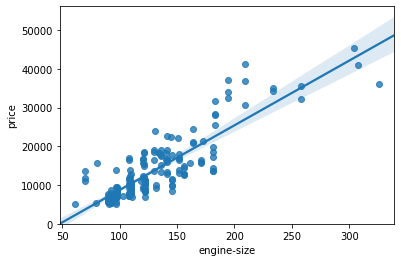

In [4]:
sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.ylim(0,)

As the engine-size increases, the price increases, indicating a positive direct correlation between these two variables. Thus, engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [5]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


#### Negative linear relationship: let's find the scatter plot of 'highway-mpg' and price

In [6]:
df['highway-mpg'] = 235/df['highway-L/100km']

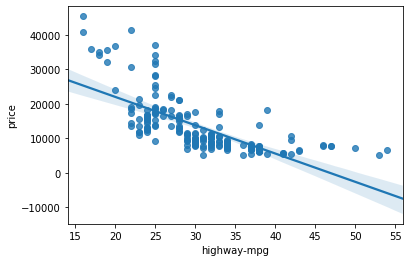

In [7]:
sns.regplot(x = 'highway-mpg', y = 'price', data = df)

As the highway-mpg increases, the price decreases, indicating an inverse/negative relationship between these two variables. These two variables are said to have negative correlation. Highway mpg could potentially be a predictor of price.

In [8]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


#### Weak linear relationship: Let's see if "Peak-rpm" as a predictor variable of "price"

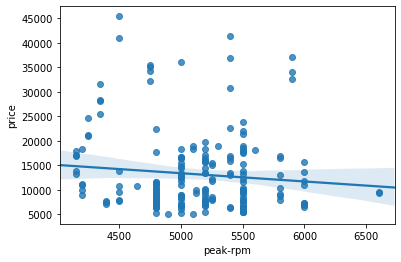

In [9]:
sns.regplot(x = 'peak-rpm', y = 'price', data = df)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal (very low correlation). Also, the data points are very scattered and are far from the fitted line, showing lots of variability. Therefore it is not a reliable variable.

In [10]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


### B. Categorical Variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

Since the categorical variables are not continuous, we can not plot the scatter plot to see a trend and infer about the relationship between the feature variable and target variable. Thus, using boxplot, we compare overall distribution, to infer whether the target variable depends on the various categories of that particular feature variable or not.

Let's look at the relationship between "body-style" and "price":

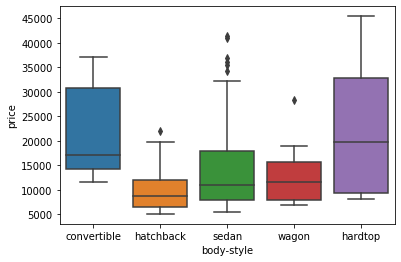

In [11]:
sns.boxplot(x = 'body-style', y = 'price', data = df)

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine "engine-location" and "price" :

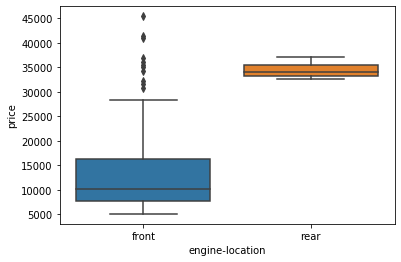

In [12]:
sns.boxplot(x = 'engine-location', y = 'price', data = df)

We see that the distribution is sensitive to the engine-location variable. The distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

Let's examine "drive-wheels" and "price":

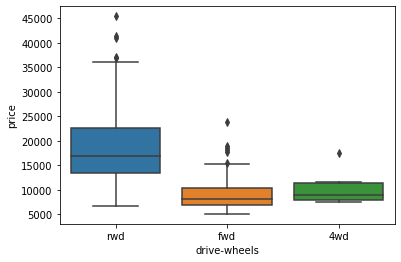

In [13]:
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

## 2. Descriptive Statistical Analysis

It is recommended to have some basic idea about the data before we march on to serious predictive modelling. We can readily obtain basic statistics about the variables using describe() method. Any NaN values are automatically skipped in these statistics.

In [14]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo,highway-mpg
count,201.000000,201.00000,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,2.026019e-15,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,8.044957,13207.129353,9.944145,0.099502,0.900498,0.820896,0.179104,30.686567
std,1.254802,31.99625,6.066366,1.000000e+00,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,1.840739,7947.066342,2.534599,0.300083,0.300083,0.384397,0.384397,6.815150
min,-2.000000,65.00000,86.600000,-2.686295e+00,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000,16.000000
25%,0.000000,101.00000,94.500000,-6.006241e-01,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,0.000000,1.000000,1.000000,0.000000,25.000000
50%,1.000000,122.00000,97.000000,-8.123525e-02,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,0.000000,1.000000,1.000000,0.000000,30.000000
75%,2.000000,137.00000,102.400000,7.546561e-01,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,0.000000,1.000000,1.000000,0.000000,34.000000
max,3.000000,256.00000,120.900000,2.751057e+00,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000,54.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [15]:
df.describe(include = ['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


Value-counts tells us how many units of each characteristic/variable we have. Note that the method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']", not two "df[['drive-wheels']]".

In [16]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [17]:
df['drive-wheels'].value_counts().to_frame()        #converts the series to a Dataframe

,drive-wheels
fwd,118
rwd,75
4wd,8


Lets create a dataframe for the frequency count of various categories of 'drive-wheels' feature

In [18]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame() # create frequency dataframe
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, 
                           inplace=True)                    # rename column to value_counts
drive_wheels_counts.index.name = 'drive-wheels'             # rename index to drive-wheels
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Lets do it for the variable 'engine-location'

In [19]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine-location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, creating a skewed result. Thus, we are not able to draw any conclusions about the engine location.

## 3. Basic of Grouping

We can group a categorial variable data into its various categories using groupby method. Grouping can be done based on one or several variables, and analysis is performed on the individual groups.

Let's group by the variable 'drive-wheels'. We see that there are 3 different categories of drive-wheels 

In [20]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Thus, when we group by 'drive-wheels', we will have three groups rwd, fwd and 4wd. We can then apply methods on these groups.

Suppose we want to know, on average, which type of drive-wheels is most valuable. To answer this, we can group 'drive-wheels' and then find the average price for each category of drive-wheels.

In [21]:
df_group_one = df[['drive-wheels', 'body-style', 'price']]
df_group_one = df_group_one.groupby(['drive-wheels'], as_index = False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


We see that rear-wheel drive vehicals are, on average, the most expensive, while 4 wheel and front-wheel are approximately the same in price.

Now, let's try grouping with multiple variables. Let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'.

In [22]:
df_group_multi = df[['drive-wheels', 'body-style', 'price']]
df_group_multi = df_group_multi.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
df_group_multi

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is convenient to visualise in a pivot table, with one variable along the column and another along the row. 

In [23]:
df_multi_pivot = df_group_multi.pivot(index = 'drive-wheels', columns = 'body-style')
df_multi_pivot = df_multi_pivot.fillna(0)       # fill missing values with 0
df_multi_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Let's plot a heatmap of price as a function of variables 'drive-wheels' and 'body-style'

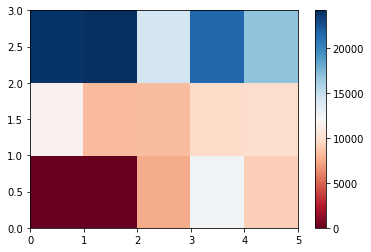

In [24]:
plt.pcolor(df_multi_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to color with respect to the variables 'drive-wheels' (vertical axis) and 'body-style' (horizontal axis). The default labels convey no useful information to us. Let's change that:

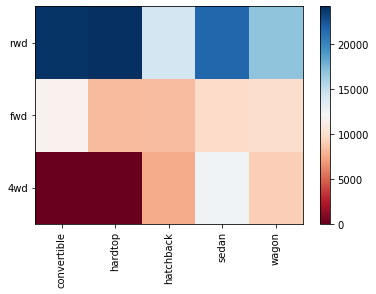

In [25]:
fig, ax = plt.subplots()
im = ax.pcolor(df_multi_pivot, cmap = 'RdBu')

row_labels = df_multi_pivot.columns.levels[1]                      # label names
col_labels = df_multi_pivot.index

ax.set_xticks(np.arange(df_multi_pivot.shape[1])+0.5, minor=False) # move ticks/labels to center
ax.set_yticks(np.arange(df_multi_pivot.shape[0])+0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)                        # insert labels
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)    # rotate label if too long

fig.colorbar(im)
plt.show()

## 4. Correlation

Correlation is a measure of the extent of interdependence between variables. In other words, when we look at two variables over time, if one variable changes, how does this affect change in the other variable. For example, we saw in the above regression plotting that price of the car is correlated to engine-size and highway-mpg.

The Pearson correlation measures the strength of correlation between two variables. The resulting coefficient is a value between -1 and 1 inclusive:
 - 1: Total positive linear correlation
 - 0: No linear correlation
 - -1: Total negative linear correlation

Pearson correlation is the default method of the function corr(). It calculates the correlation between variables of type "int64" or "float64", leaving the object type variables.

In [26]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,diesel,gas,aspiration-std,aspiration-turbo,highway-mpg
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615,0.036233
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911,-0.181877
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889,-0.543304
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085,-0.698142
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732,-0.680635
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336,-0.104812
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955,-0.794889
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040,-0.679571
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816,-0.591309
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,-0.033956,0.047089,0.082269,0.036133,0.241064,-0.241064,-0.218233,0.218233,-0.034636


We can also restrict the correlation only between the features we are interested in and not the whole dataframe. The correlation between columns bore, stroke, compression-ratio, and horsepower is computed as:

In [27]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187871,0.098267
compression-ratio,0.001263,0.187871,1.000000,-0.214514
horsepower,0.566936,0.098267,-0.214514,1.000000


**P-value**: P-value is a probabality that quantifies the significance of the correlation estimate (Pearson correlation coefficient).  In other words, it tells us about how certain we are about the correlation coefficient we have calculated.

Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant. The convention is :
 - p < 0.001: Strong certainty (about the correlatin coefficient we have calculated)
 - p < 0.05: Moderate certainty
 - p < 0.1: Weak cetainty
 - p > 0.1: No certainty

Let's calculate the Pearson correlation coefficient and P-value of 'wheel-base' and 'price' :

In [28]:
pearson_coeff, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print(pearson_coeff, p_value)

0.584641822265508 8.076488270733218e-20


Conclusion: The correlation between wheel-base and price is statistically significant, although the linear relationship is not extremely strong (~0.58).

Let's calculate the Pearson correlation coefficient and P-value of 'engine-size' and 'price' :

In [29]:
pearson_coeff, p_value = stats.pearsonr(df['engine-size'], df['price'])
print(pearson_coeff, p_value)

0.8723351674455185 9.265491622198389e-64


Conclusion: The correlation between engine-size and price is statistically significant, and the linear relationship is very strong.

Let's calculate the Pearson Correlation Coefficient and P-value of 'city-mpg' and 'price' :

In [30]:
pearson_coeff, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print(pearson_coeff, p_value)

-0.6865710067844677 2.321132065567674e-29


Conclusion: The correlation between city-mpg and price is statistically significant, and the relationship is negative and moderately strong